In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append(os.path.dirname(os.getcwd()))
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns

import tensorflow as tf

# tf.enable_eager_execution()
sns.set(style="white", context="notebook", palette="deep")

%matplotlib inline

In [4]:
project_dir = Path.cwd().parent
model_path = project_dir / "model" / "mnist_symbols_imbalance_993.h5"
model_path.exists()

True

In [5]:
model = tf.keras.models.load_model(model_path)

In [6]:
from src.inference import (classify_image, convert_image_to_tensor,
                           mark_equations, parse_equation, resize_image)
from src.bounding_box import get_bounding_box
from src.equation_generator import EquationGenerator

In [7]:
data_dir = project_dir / "data" / "CROHME"

In [7]:
generator = EquationGenerator(data_dir=data_dir, output_size=(640, 236),
                              char_spacing=8)

In [9]:
preview_image(image_path)

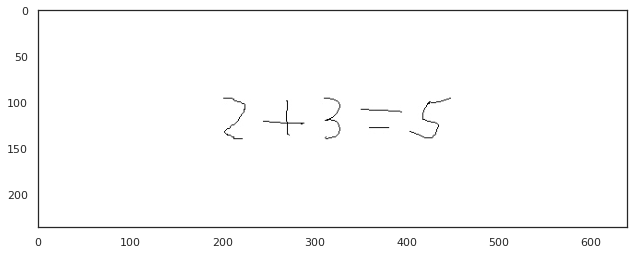

In [8]:
image, coords, equation = generator.generate_equation("2+3=5")
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
axes.imshow(image, cmap="gray")

199 94 28 49
242 97 49 42
308 94 22 49
348 106 49 25
401 94 49 48


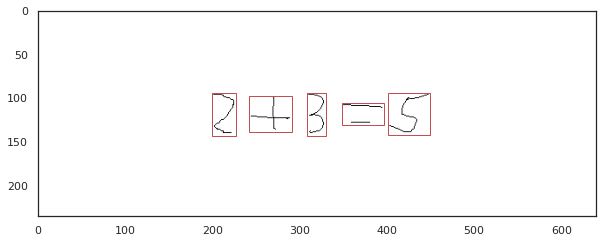

In [9]:
boxes = get_bounding_box(np.array(image))
fig,ax = plt.subplots(1, figsize=(10, 5))
ax.imshow(image, cmap="gray")

for left, top, width, height in boxes:
    print(left, top, width, height)
    rect = patches.Rectangle((left, top), width, height, linewidth=1,
                             edgecolor="r", facecolor="none")
    ax.add_patch(rect)

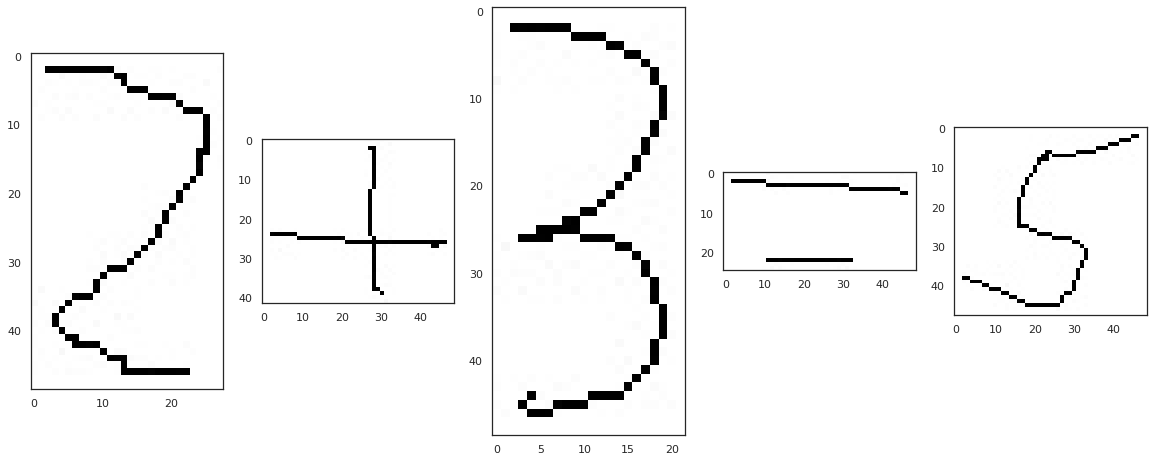

In [10]:
image_arr = np.array(image)
crop_images = [image_arr[top : top + height, left : left + width] for left, top, width, height in boxes]

plt.figure(figsize=(20, 10))
columns = len(crop_images)
for i, image in enumerate(crop_images):
    plt.subplot(1, columns, i + 1)
    plt.imshow(image, cmap="gray")

In [11]:
tmp_dir = project_dir / "tmp"
image_paths = []
os.makedirs(tmp_dir, exist_ok=True)
for i, image in enumerate(crop_images):
    image_path = tmp_dir / f"char_{i}.jpg"
    Image.fromarray(image, mode="L").save(image_path)
    image_paths.append(image_path)

In [12]:
parse_equation(image_paths)

INFO:inference:Loaded model


'2+3=5'

# Generate multiple equations to simulate a worksheet

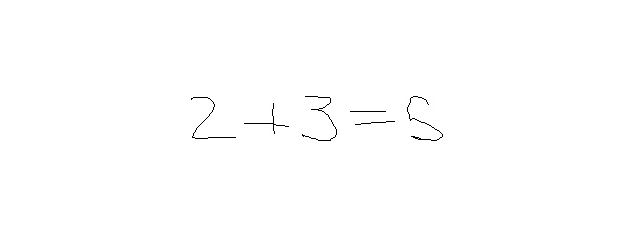

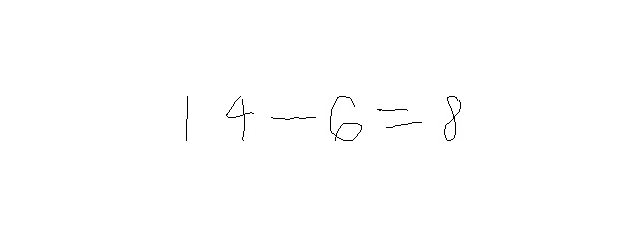

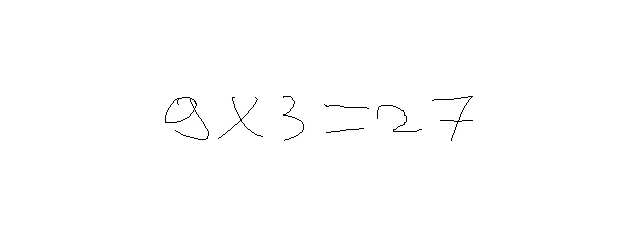

In [13]:
equations = ["2+3=5", "14-6=8", "9*3=27"]
images = []

generator = EquationGenerator(data_dir=data_dir, output_size=(640, 236),
                              char_spacing=8)

for equation in equations:
    image, coords, equation = generator.generate_equation(equation)
    display(image)
    images.append(image)

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

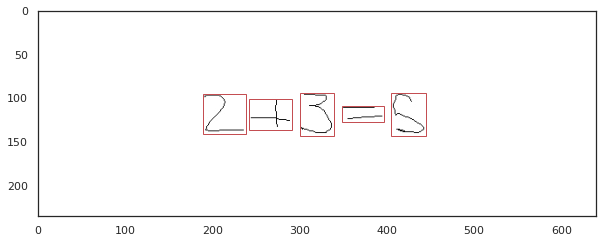

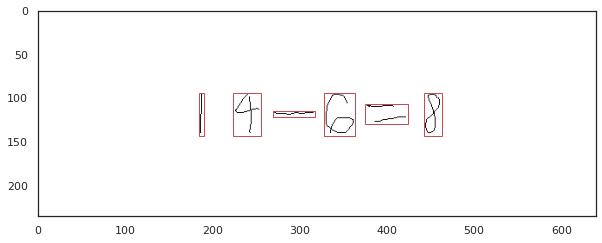

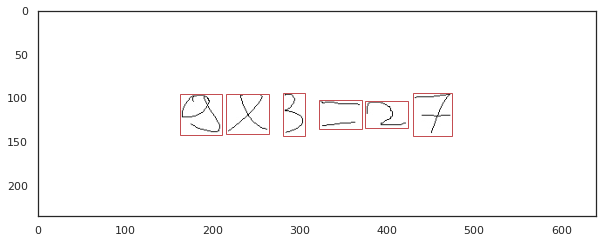

In [19]:
equation_boxes = []
for image in images:
    boxes = get_bounding_box(np.array(image))
    equation_boxes.append(boxes)

    fig,ax = plt.subplots(1, figsize=(10, 5))
    ax.imshow(image, cmap="gray")

    for left, top, width, height in boxes:
        rect = patches.Rectangle((left, top), width, height, linewidth=1,
                                 edgecolor="r", facecolor="none")
        ax.add_patch(rect)
    display(ax)

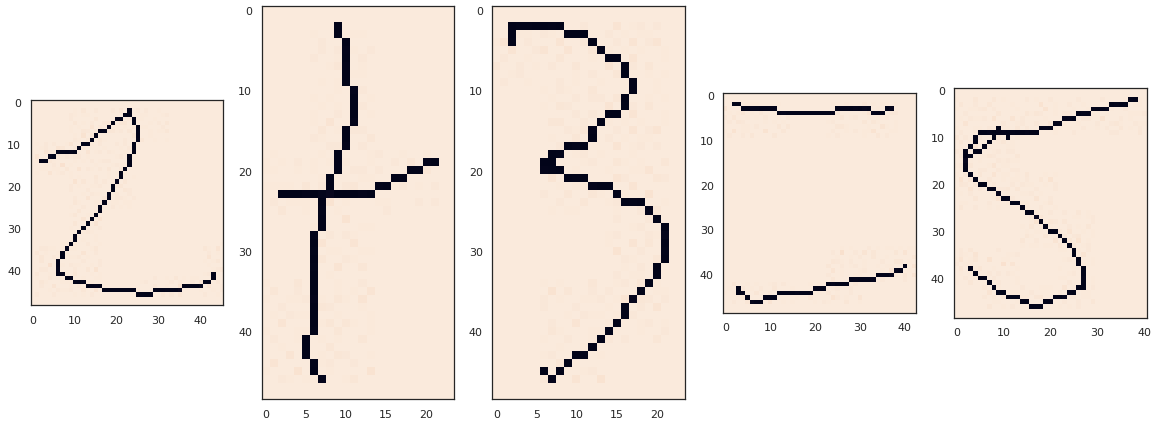

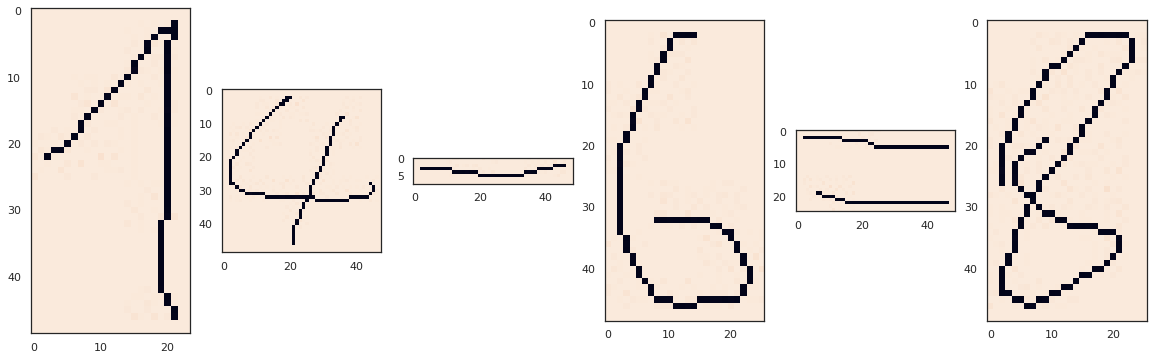

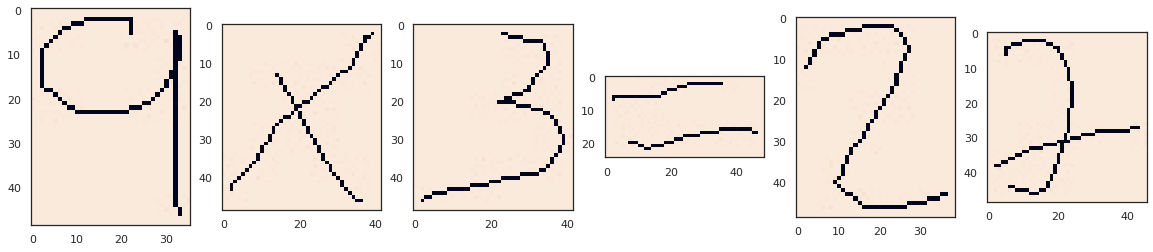

In [40]:
crop_equation_images = []
for image, boxes in zip(images, equation_boxes):
    image_arr = np.array(image)
    crop_images = [image_arr[top : top + height, left : left + width]
                 for left, top, width, height in boxes]
    crop_equation_images.append(crop_images)

    plt.figure(figsize=(20, 10))
    columns = len(crop_images)
    for i, image in enumerate(crop_images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image)

In [41]:
image_paths = []
tmp_dir.mkdir(parents=True, exist_ok=True)
for i, equation_images in enumerate(crop_equation_images):
    image_paths.append([])
    for j, image in enumerate(equation_images):
        image_path = tmp_dir / f"eqn_{i}_char_{j}.jpg"
        Image.fromarray(image, mode="L").save(image_path)
        image_paths[-1].append(image_path)

In [42]:
equations = []
for char_paths in image_paths:
    equation = parse_equation(char_paths)
    print(equation)
    equations.append(equation)

/mnt/c/LYer/GitRepos/WSL/math-grader/model/mnist_symbols_imbalance_993.h5
INFO:inference:Loaded model
2+3=5
/mnt/c/LYer/GitRepos/WSL/math-grader/model/mnist_symbols_imbalance_993.h5
INFO:inference:Loaded model
1426=8
/mnt/c/LYer/GitRepos/WSL/math-grader/model/mnist_symbols_imbalance_993.h5
INFO:inference:Loaded model
9*3=27


In [43]:
mark_equations(equations)

[True, False, True]